In [1]:
from similarityfunctions import *
from hypfunctions import *
import networkx as nx
from itertools import permutations, combinations
import pandas as pd
import matplotlib. pyplot as plt 

13


C:\Users\hanaa\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


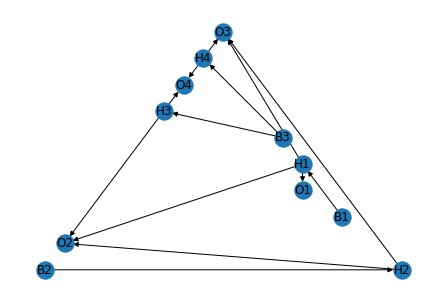

In [2]:
# make the graph
dg = nx.DiGraph()
dg.add_nodes_from(['B1', 'B2', 'B3', 'H1', 'H2', 'H3', 'H4', 'O1', 'O2', 'O3', 'O4'])
dg.add_weighted_edges_from([('B1', 'H1', .00131998), ('B2', 'H2', .253215), ('B3', 'H3', .164102),
                            ('B3', 'H4', .00192481), ('H1', 'O1', .0998799), ('H1', 'O2', .132026),
                           ('H1', 'O3', .149337), ('H2', 'O2', .0873762), ('H2', 'O3', .118668),
                           ('H3', 'O2', .123934), ('H3', 'O4', .0342232), ('H4', 'O3', .0717882),
                           ('H4', 'O4', .04508)])

print(len(dg.edges()))
nx.draw_planar(dg, with_labels = True)

In [3]:
bnodes = [node for node in list(dg.nodes()) if not list(dg.predecessors(node)) and list(dg.successors(node))] #root nodes
observations = [node for node in list(dg.nodes()) if not list(dg.successors(node)) and list(dg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(dg, observations, bnodes)

print(bnodes) 
print(observations) 
print(hypotheses)

['B1', 'B2', 'B3']
['O1', 'O2', 'O3', 'O4']
[['H1', 'H4'], ['H1', 'H2', 'H4'], ['H1', 'H2', 'H3', 'H4'], 'H1']


In [4]:
# learn the CPTable


########## BACKGROUND
# B1
cpt_B1 = CPT(0)
cpt_B1.add_entry_self((1-.0260472, .0260472))
dg.nodes['B1']['CPT'] = cpt_B1

# B2
cpt_B2 = CPT(0)
cpt_B2.add_entry_self((1-.615996, .615996))
dg.nodes['B2']['CPT'] = cpt_B2

# B3
cpt_B3 = CPT(0)
cpt_B3.add_entry_self((1-.318892, .318892))
dg.nodes['B3']['CPT'] = cpt_B3


########### HYPOTHESES
# H1
cpt_H1 = CPT(1)
cpt_H1.add_entry([1], (1-.371292, .371292))
cpt_H1.add_entry([0], (1-.532645, .532645))
dg.nodes['H1']['CPT'] = cpt_H1

# H2
cpt_H2 = CPT(1)
cpt_H2.add_entry([1], (1-.50549, .50549))
cpt_H2.add_entry([0], (1-.694085, .694085))
dg.nodes['H2']['CPT'] = cpt_H2

# H3
cpt_H3 = CPT(1)
cpt_H3.add_entry([1], (1-.646029, .646029))
cpt_H3.add_entry([0], (1-.164357, .164357))
dg.nodes['H3']['CPT'] = cpt_H3

# H4
cpt_H4 = CPT(1)
cpt_H4.add_entry([1], (1-.371292, .371292))
cpt_H4.add_entry([0], (1-.425611, .425611))
dg.nodes['H4']['CPT'] = cpt_H4


############# OBSERVED EFFECTS
cpt_O1 = CPT(1)
cpt_O1.add_entry([1], (1-.845371, .845371))
cpt_O1.add_entry([0], (1-.503606, .503606))
dg.nodes['O1']['CPT'] = cpt_O1

cpt_O2 = CPT(3)
cpt_O2.add_entry([1, 1, 1], (1-.485969, .485969))
cpt_O2.add_entry([1, 1, 0], (1-.702458, .702458))
cpt_O2.add_entry([1, 0, 1], (1-.521399, .521399))
cpt_O2.add_entry([1, 0, 0], (1-.30641, .30641))
cpt_O2.add_entry([0, 1, 1], (1-.876099, .876099))
cpt_O2.add_entry([0, 1, 0], (1-.131251, .131251))
cpt_O2.add_entry([0, 0, 1], (1-.292697, .292697))
cpt_O2.add_entry([0, 0, 0], (1-.255582, .255582))
dg.nodes['O2']['CPT'] = cpt_O2


cpt_O3 = CPT(3)
cpt_O3.add_entry([1, 1, 1], (1-.443595, .443595))
cpt_O3.add_entry([1, 1, 0], (1-.0692005, .0692005))
cpt_O3.add_entry([1, 0, 1], (1-.760635, .760635))
cpt_O3.add_entry([1, 0, 0], (1-.562661, .562661))
cpt_O3.add_entry([0, 1, 1], (1-.398679, .398679))
cpt_O3.add_entry([0, 1, 0], (1-.714025, .714025))
cpt_O3.add_entry([0, 0, 1], (1-.403932, .403932))
cpt_O3.add_entry([0, 0, 0], (1-.315988, .315988))
dg.nodes['O3']['CPT'] = cpt_O3


cpt_O4 = CPT(2)
cpt_O4.add_entry([1, 1], (1-.76531, .76531))
cpt_O4.add_entry([1, 0], (1-.879789, .879789))
cpt_O4.add_entry([0, 1], (1-.894966, .894966))
cpt_O4.add_entry([0, 0], (1-.656085, .656085))
dg.nodes['O4']['CPT'] = cpt_O4

# Edge Generation
Generate edges from the partial explanation hypothesis node to all missing observations

In [5]:
# get partial explanations
single_hyp = [h for h in hypotheses if not isinstance(h, list)]

# for each partial explanation, identify observations that are not descendants, add edges to those observations
new_edges = []
for s in single_hyp:
    descendants = list(nx.descendants(dg, s))
    missing_obs = list(set(observations) - set(descendants))
    for o in missing_obs:
        dg.add_edge(s, o)
        new_edges.append((s, o))
new_edges

[('H1', 'O4')]

In [6]:
# add edge weight
dg.add_weighted_edges_from([('H1', 'O4', .125332)])

# learn updated CPT table
cpt_O4 = CPT(3)
cpt_O4.add_entry([1, 1, 1], (1-.142328, .142328))
cpt_O4.add_entry([1, 1, 0], (1-.248076, .248076))
cpt_O4.add_entry([1, 0, 1], (1-.492232, .492232))
cpt_O4.add_entry([1, 0, 0], (1-.880375, .880375))
cpt_O4.add_entry([0, 1, 1], (1-.627151, .627151))
cpt_O4.add_entry([0, 1, 0], (1-.127184, .127184))
cpt_O4.add_entry([0, 0, 1], (1-.155563, .155563))
cpt_O4.add_entry([0, 0, 0], (1-.501294, .501294))
dg.nodes['O4']['CPT'] = cpt_O4

In [7]:
hypotheses = findHypotheses(dg, observations, bnodes)
print(hypotheses)

[['H1'], ['H1', 'H3'], ['H1', 'H2', 'H3'], ['H1', 'H3', 'H4'], 'H1']


## Compile graph data

In [8]:
scenarios = get_possible_truths(dg, bnodes, observations)
truths = [list(k) for k in list(scenarios.keys())]
falses = list(scenarios.values())

In [9]:
fbe1 = get_all_FBE(dg, observations, bnodes)
fbe2 = get_all_FBE(dg, observations, bnodes, flipped=True)

(['H1'], 0.061747993574619145)
(['H1', 'H3'], 0.029422349467866177)
(['H1', 'H2', 'H3'], 0.024779839543526753)
(['H1', 'H3', 'H4'], 0.009785682772619538)
('H1', 1.0)
(['H1'], 0.10089576210436627)
(['H1', 'H3'], 0.044381596915870666)
(['H1', 'H2', 'H3'], 0.03134642496631645)
(['H1', 'H3', 'H4'], 0.014644198143489686)
('H1', 1.0)
(['H1'], 0.282675054092777)
(['H1', 'H3'], 0.25459096566976586)
(['H1', 'H2', 'H3'], 0.2142767748715824)
(['H1', 'H3', 'H4'], 0.0723727445576324)
('H1', 1.0)
(['H1'], 0.4063221935575624)
(['H1', 'H3'], 0.19360877792658376)
(['H1', 'H2', 'H3'], 0.1630595291677429)
(['H1', 'H3', 'H4'], 0.06439302493002087)
('H1', 1.0)
(['H1'], 0.35229525525435745)
(['H1', 'H3'], 0.11754951193075028)
(['H1', 'H2', 'H3'], 0.09667778518885595)
(['H1', 'H3', 'H4'], 0.039051199166426784)
('H1', 1.0)
(['H1'], 0.1047858840246318)
(['H1', 'H3'], 0.032297390210684056)
(['H1', 'H2', 'H3'], 0.015278471498381442)
(['H1', 'H3', 'H4'], 0.02197356959096077)
('H1', 1.0)
(['H1'], 0.329134893962456

In [114]:
# get fbe_1 flipped

def get_flipped_prob(graph, observations, bnodes, hyp, flipped=True):
    hypotheses = findHypotheses(graph, observations, bnodes)
    not_hyp = bnodes + observations
    possibly_true = []
    for i in range(1, len(not_hyp) + 1):
        possibly_true += [list(x) for x in it.combinations(not_hyp, i)]
    possibly_true

    prob = []
    for t in possibly_true:
        false_nodes = list(set(not_hyp) - set(t))
        observeData(graph, t, false_nodes)
        prob.append(calculateTotalMarginalProbabilityObs(graph, list(hyp), observations, bnodes))
    
    return prob

In [115]:
hyp_check = get_flipped_prob(dg, observations, bnodes, 'H1')

In [116]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
original_data = {}
original_data['True Nodes'] = truths
original_data['# of True Nodes'] = [len(t) for t in original_data.get('True Nodes')]
original_data['False Nodes'] = falses
original_data['Best Explanation'] = [v[0] for v in list(fbe1.values())]
original_data['P(O|H)'] = [v[1] for v in list(fbe1.values())]
original_data['P(H|O)'] = hyp_check
original_data['Best Explanation (flipped)'] = [v[0] for v in list(fbe2.values())]
original_data['P(H|O)'] = [v[1] for v in list(fbe2.values())]


df1 = pd.DataFrame(original_data, columns=list(original_data.keys()))
df1

,True Nodes,# of True Nodes,False Nodes,Best Explanation,P(O|H),P(H|O),Best Explanation (flipped)
0,[B1],1,"[B2, O3, O2, O4, B3, O1]",H1,1.0,0.082212,H1
1,[B2],1,"[O3, O2, O4, B3, B1, O1]",H1,1.0,0.067900,H1
2,[B3],1,"[B2, O3, O2, O4, B1, O1]",H1,1.0,0.054682,H1
3,[O1],1,"[B2, O3, O2, O4, B3, B1]",H1,1.0,0.262951,"[H1, H2, H3]"
4,[O2],1,"[B2, O3, O4, B3, B1, O1]",H1,1.0,0.045471,"[H1, H2, H3]"
...,...,...,...,...,...,...,...
122,"[B1, B2, B3, O2, O3, O4]",6,[O1],H1,1.0,0.024187,H1
123,"[B1, B2, O1, O2, O3, O4]",6,[B3],H1,1.0,0.085379,[H1]
124,"[B1, B3, O1, O2, O3, O4]",6,[B2],H1,1.0,0.047504,[H1]
125,"[B2, B3, O1, O2, O3, O4]",6,[B1],H1,1.0,0.055718,[H1]


In [112]:
df1.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-data-3.xlsx')

Graphs: 
1. len of True Nodes list vs P(H|O)
2. len of hyp vs P(H|O)

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]


Text(0, 0.5, 'P(H|O)')

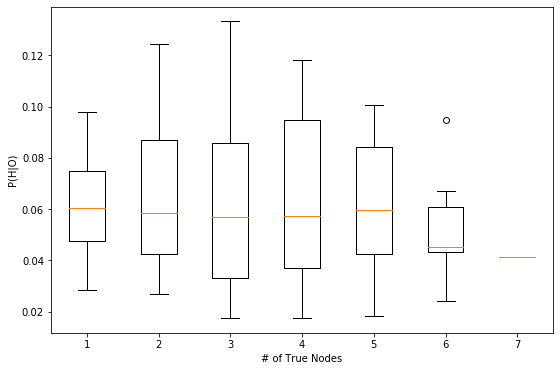

In [95]:
# create dict {len true nodes : list of probs}
len_true_nodes = [len(t) for t in original_data.get('True Nodes')]
print(len_true_nodes)

p1, p2, p3, p4, p5, p6, p7 = [], [], [], [], [], [], []
true_probs_dict = {}
counter = 0
for t in original_data.get('True Nodes'):
    lent = len(t)
    prob = original_data.get('P(H|O)')[counter]
    if (lent == 1): p1.append(prob)
    elif not isinstance(t, list): p1.append(prob)
    elif (lent == 2): p2.append(prob)
    elif (lent == 3): p3.append(prob)
    elif (lent == 4): p4.append(prob)
    elif (lent == 5): p5.append(prob)
    elif (lent == 6): p6.append(prob)
    elif (lent == 7): p7.append(prob)
    counter += 1
    
true_probs_dict[1] = p1
true_probs_dict[2] = p2
true_probs_dict[3] = p3
true_probs_dict[4] = p4
true_probs_dict[5] = p5
true_probs_dict[6] = p6
true_probs_dict[7] = p7

true_data = [p1, p2, p3, p4, p5, p6, p7]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(true_data)

ax.set_xlabel('# of True Nodes')
ax.set_ylabel('P(H|O)')

Text(0, 0.5, 'P(H|O)')

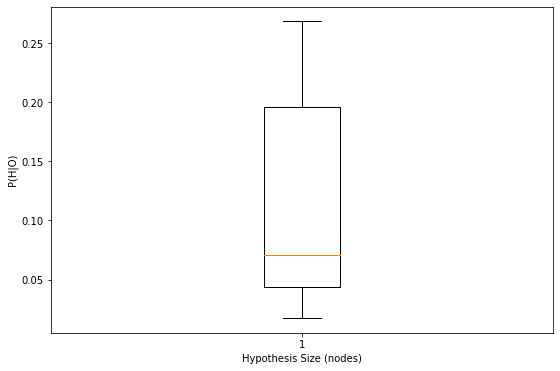

In [113]:
plt.close()

# create dict {len true nodes : list of probs}

p1, p2, p3 = [], [], []
hyp_size = {}
counter = 0
for h in original_data.get('Best Explanation'):
    lenH = len(h)
    prob = original_data.get('P(H|O)')[counter]
    if (lenH == 1) or not isinstance(h, list): p1.append(prob)
    counter += 1
    
hyp_size[1] = p1

hyp_size_data = p1

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(hyp_size_data)

ax.set_xlabel('Hypothesis Size (nodes)')
ax.set_ylabel('P(H|O)')

# Unused

In [11]:
"""# for each hyp, count the number of times it is the best explanation
count1 = fbeCount(fbe1, hypotheses)
count2 = fbeCount(fbe2, hypotheses)

# for each hyp, count the number of its observed descendants
hyp_desc_dict = getHypDesc(dg, hypotheses, observations)
desc_count = {k:len(v) for k,v in hyp_desc_dict.items()}
hyp_desc_dict, desc_count"""

({('H1',): ['O4', 'O1', 'O2', 'O3'],
  ('H1', 'H3'): ['O4', 'O1', 'O2', 'O3'],
  ('H1', 'H2', 'H3'): ['O4', 'O1', 'O2', 'O3'],
  ('H1', 'H3', 'H4'): ['O4', 'O1', 'O2', 'O3'],
  'H1': ['O2', 'O1', 'O4', 'O3']},
 {('H1',): 4,
  ('H1', 'H3'): 4,
  ('H1', 'H2', 'H3'): 4,
  ('H1', 'H3', 'H4'): 4,
  'H1': 4})

In [ ]:
"""blockPrint()
hyp_dict = getHypData(dg, hypotheses, observations, bnodes)"""

In [ ]:
"""# for each possible hypothesis, get the count & truth value combo & num of observed descendants
hyp_data = {}
hyp_data['Best Explanations'] = list(hyp_dict.keys())
hyp_data['# of Observed Descendants'] = [v[0] for v in list(hyp_dict.values())]
hyp_data['Best Expl. Count'] = [v[1] for v in list(hyp_dict.values())]
hyp_data['Best expl. (flipped) count'] = [v[2] for v in list(hyp_dict.values())]

df2 = pd.DataFrame(hyp_data, columns=list(hyp_data.keys()))
df2"""

Export both data tables to excel

In [ ]:
"""df1.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-data.xlsx')
df2.to_excel(r'C:\Users\hanaa\OneDrive\amistad 2020\figures\refined-hyp-counts.xlsx')"""